# Penjelasan
[Google Colab Terbaru](https://colab.research.google.com/drive/1pXqF-TZMlo2r5xEg0JU91JBzo7sXsK8Q?usp=sharing)

#### 2. Klasifikasi
Klasifikasi adalah teknik yang digunakan untuk memodelkan hubungan antara variabel independen (fitur) dan variabel dependen (target) dengan tujuan mengklasifikasikan data ke dalam kategori atau label tertentu. Cara kerjanya adalah dengan menemukan pola dalam data yang memungkinkan model untuk memprediksi kategori dari data baru. Teknik ini digunakan untuk menentukan kelas atau kategori dari data, seperti mengidentifikasi email sebagai "spam" atau "bukan spam", atau mengklasifikasikan gambar sebagai "anjing" atau "kucing".

Berikut adalah beberapa algoritma klasifikasi beserta penjelasannya:
- Logistic Regression
> Logistic Regression adalah teknik analisis data yang menggunakan matematika untuk menentukan hubungan antara dua faktor, kemudian memprediksi nilai salah satu faktor berdasarkan faktor lainnya, dengan hasil yang biasanya terbatas seperti ya atau tidak.
- SVC (Support Vector Classifier)
> Support Vector Machine (SVM) adalah metode dalam data mining yang digunakan untuk klasifikasi dan prediksi, baik untuk masalah klasifikasi maupun regresi. Meskipun awalnya dirancang untuk kasus linear, SVM kini mampu menangani masalah non-linear dengan menggunakan teknik kernel untuk memetakan data ke ruang yang lebih tinggi, sehingga lebih efektif dalam berbagai jenis masalah data.
- Decision Tree
> Decision Tree adalah metode data processing untuk memprediksi masa depan dengan membangun model klasifikasi atau regresi dalam bentuk struktur pohon. Proses ini melibatkan pemecahan data menjadi subset yang lebih kecil secara bertahap, sehingga terbentuk pohon dengan node keputusan dan node daun. Node keputusan (misalnya, Cuaca) memiliki beberapa cabang (misalnya, Panas, Berawan, Hujan).
- Random Forest
> Random Forest terdiri dari beberapa decision tree yang dibangun dari subset dataset. Hasil akhir diprediksi berdasarkan mayoritas prediksi dari setiap tree. Semakin banyak tree yang digunakan, semakin tinggi akurasi dan semakin kecil risiko overfitting.
- Gradient Boosting
> Gradient Boosting adalah teknik machine learning yang berfokus pada meningkatkan akurasi klasifikasi dengan cara menggabungkan sejumlah model decision tree yang lemah. Setiap tree baru yang ditambahkan berfokus pada memperbaiki kesalahan dari tree sebelumnya, sehingga secara bertahap model menjadi lebih kuat dan akurat.

# Implementasi

Berikut adalah implementasi regresi dengan menerapkan CRISP-DM

#### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Business Understanding

Sebuah pabrik memiliki sistem ...

#### Data Understanding

Sebelum melatih model, kita perlu memahami data terlebih dahulu. Berikut adalah data yang akan kita gunakan.

In [ ]:
df = pd.read_csv(
    "https://gmaaliki.github.io/dataset/predictive_maintenance.csv")

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Dari tabel diatas, dapat dilihat bahwa data yang dimiliki oleh perusahaan terdiri dari 10 fitur yaitu:
- UDI (id unik 1-10000)
- productID (id produk)
- Type (kualitas produk; L=low, M=medium, H=high)
- Air temperature [K])
- Process temperature [K]
- Rotational speed [rpm]
- Torque [Nm]
- Tool wear [min]
- Target (variabel target)
- Failure Type (variabel target)

In [ ]:
df.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Target,2
Failure Type,6


Fitur `UDI` dan `productID` dapat di drop karena semua valuenya unik sehingga tidak akan berpengaruh kepada prediksi model

In [ ]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

Kita dapat melihat informasi mengenai dataset dengan menggunakan `df.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
df.shape

(10000, 8)

Untuk mengetahui jumlah data yang memiliki `null` value, dapat menggunakan `df.isnull().sum()`. Apabila terdapat data yang mempunyai nilai `null`, maka perlu dihandle pada tahap data preparation. Dalam kasus ini tidak perlu karena tidak ada `null` value.

In [ ]:
df.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


Dengan menggunakan `df.describe()`, dapat ditampilkan nilai statistik dataset seperti standar deviasi dan kuartil.

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


Distribusi data dapat diketahui dengan menggunakan histogram. Pada histogram terdapat parameter `bins` yang dapat disesuaikan agar distribusi dapat lebih terlihat. Terdapat berbagai cara yang dapat dilakukan untuk menemukan jumlah `bins` optimal yang dapat dilihat pada [halaman ini](https://how2matplotlib.com/bin-size-in-matplotlib-histogram.html).

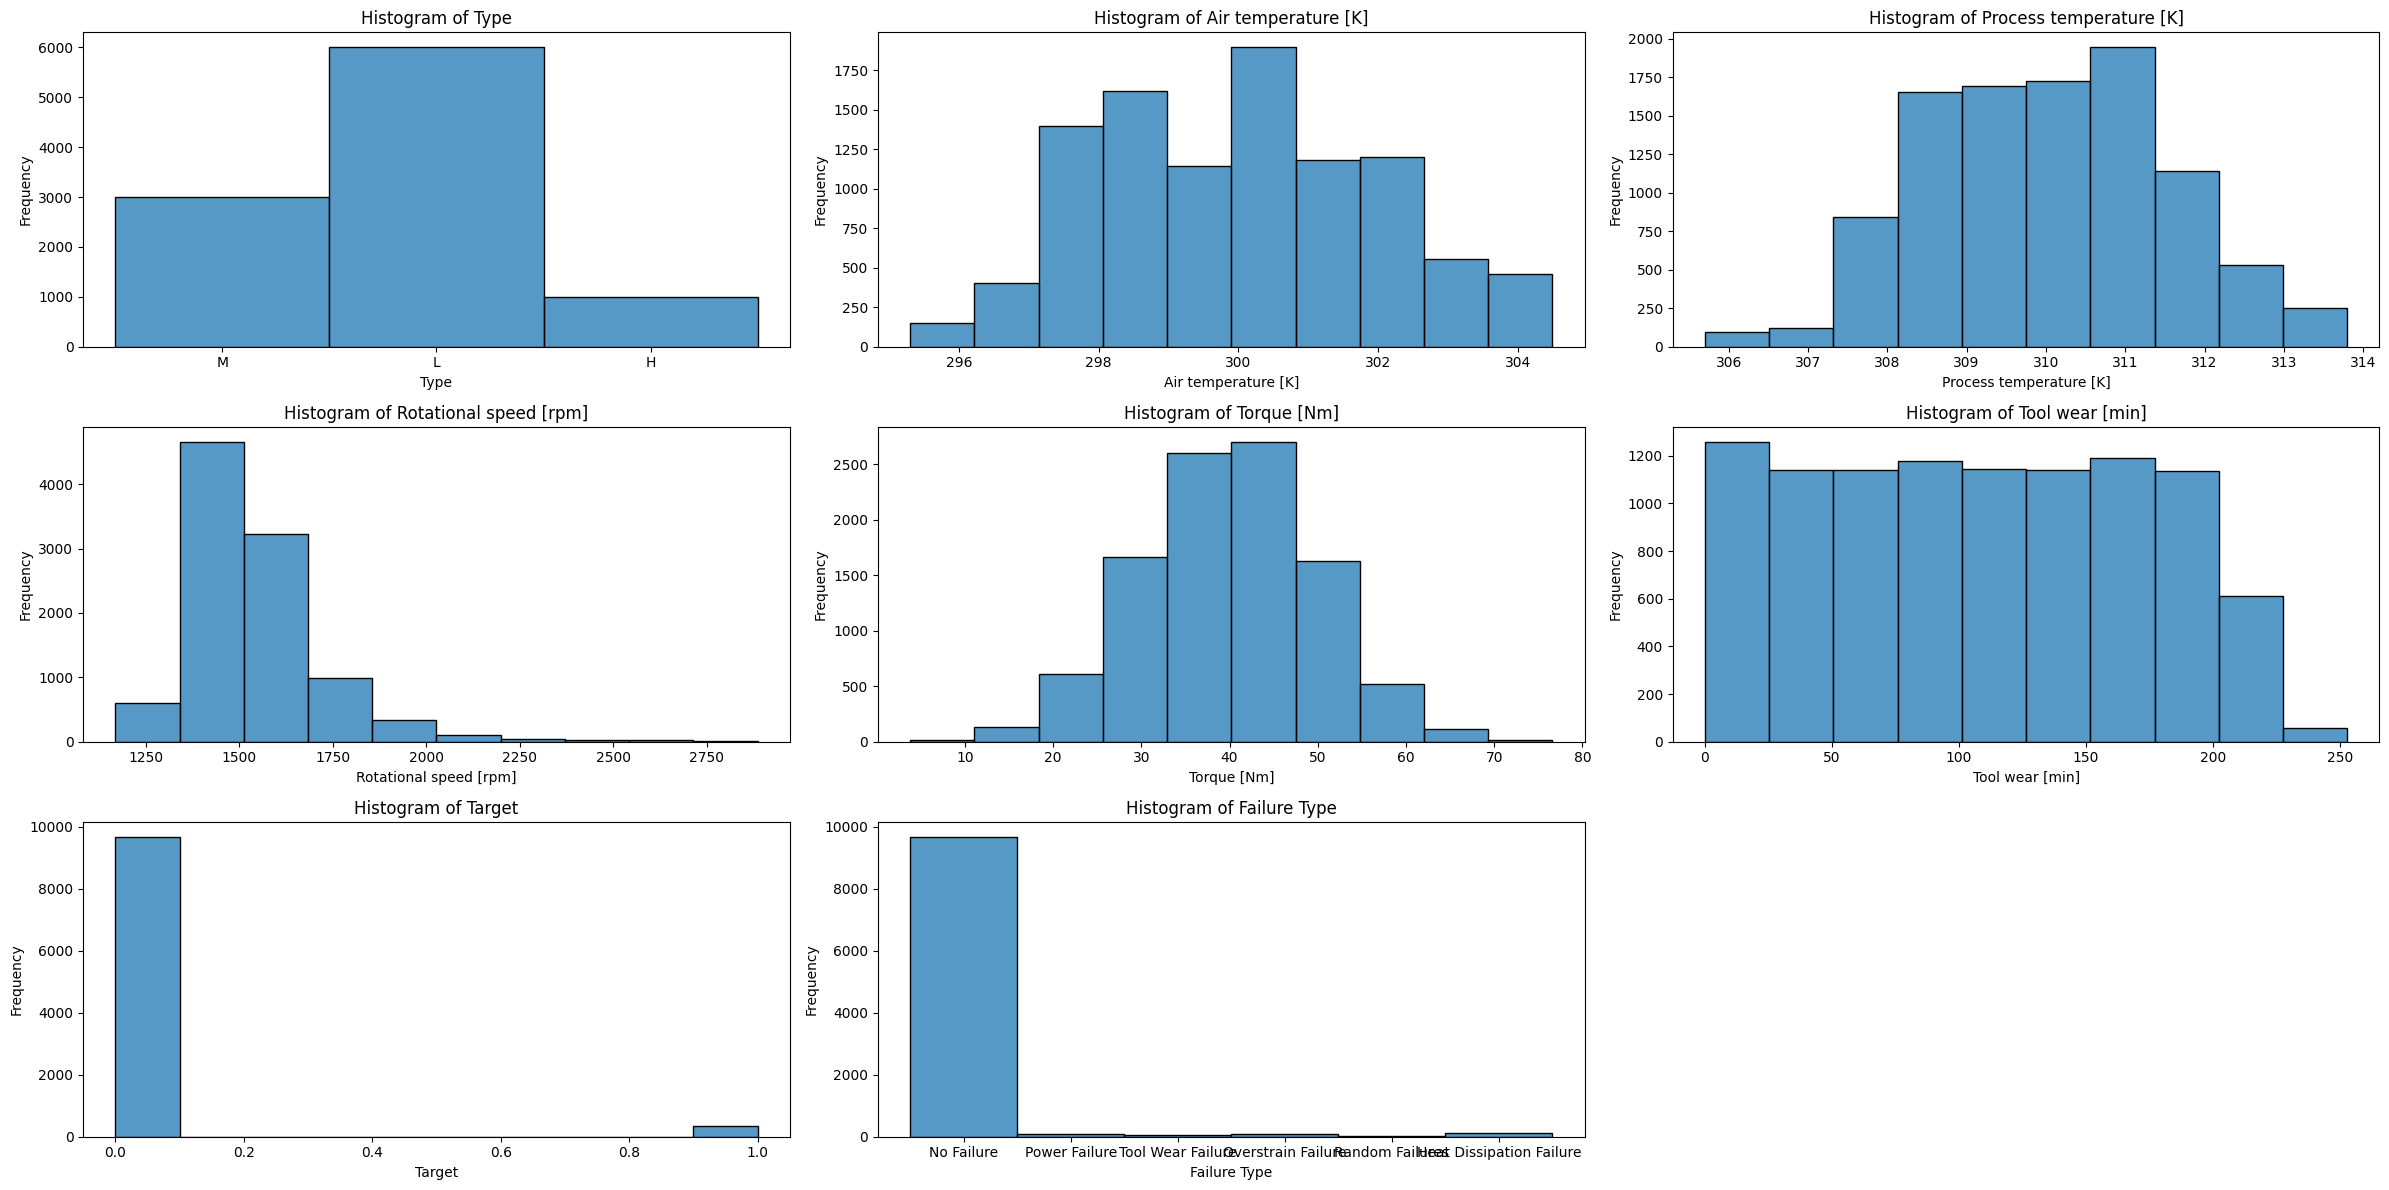

In [ ]:
import math

num_features = len(df.columns)

ncols = 3
nrows = math.ceil(num_features / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                         figsize=(8 * ncols, 4 * nrows))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=10, ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Delete empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Data Understanding

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(df_train.drop('charges', axis=1), df_train['charges'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

#### Modelling

###### Logistic Regression

###### Support Vector Classifier (SVC)

###### Decision Tree

###### Random Forest

###### Gradient Boosting

#### Evaluation